# KNN Classification - Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pls
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('iris.csv',index_col= 0)

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

## EDA

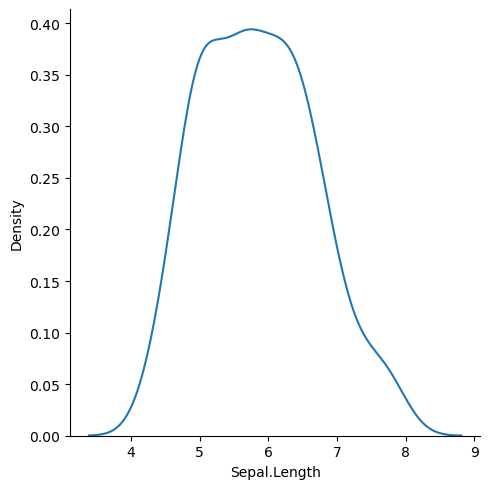

In [5]:
sns.displot(df['Sepal.Length'],kind = 'kde');

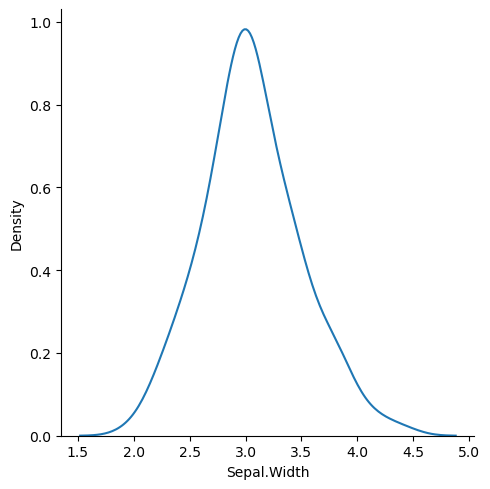

In [6]:
sns.displot(df['Sepal.Width'],kind = 'kde');

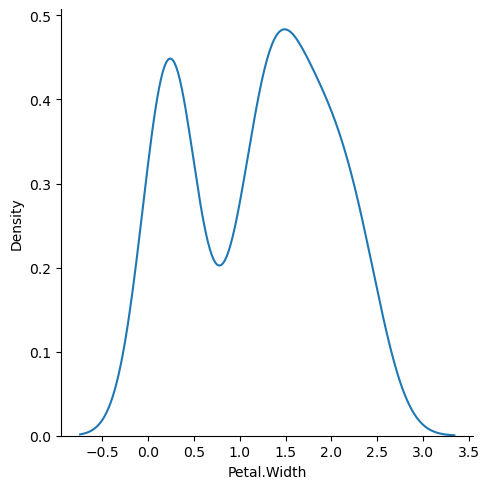

In [7]:
sns.displot(df['Petal.Width'],kind = 'kde');

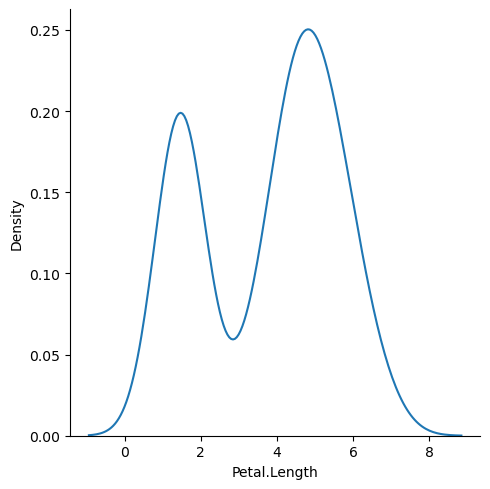

In [8]:
sns.displot(df['Petal.Length'],kind = 'kde');

In [9]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

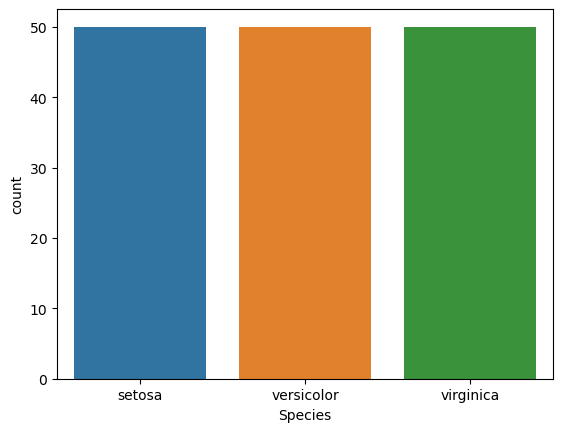

In [10]:
sns.countplot(x=df['Species']);

# Species column to numerical

In [11]:
encode = {'setosa':0,'versicolor':1,'virginica':2}

In [12]:
df['Species'] = df['Species'].replace(encode)

In [13]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


# Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = df.drop('Species',axis = 1)

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
scaled_features = scaler.transform(X)

# Train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Species'], test_size=0.2, random_state=42)

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
pred = knn.predict(X_test)

# Evaluation

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [26]:
print(confusion_matrix(y_test,pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

